# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [6]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Importar el URL 
url = "https://ycharts.com/companies/TSLA/revenues"
html_info = requests.get(url, time.sleep(10)).text

In [7]:
#Descarga del HTML
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
response = requests.get(url, headers=headers)
html_info = response.text

In [8]:
#Transformación del HTML
soup = BeautifulSoup(html_info,"html.parser")
print(soup)


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [9]:
#Buscar y trabajar con las tablas (creación de la base de datos)
tables = soup.find_all("table")

dates = [row.find_all("td")[0].text.strip() for table in tables for row in table.find("tbody").find_all("tr")]
values = [row.find_all("td")[1].text.strip() for table in tables for row in table.find("tbody").find_all("tr")]

df = pd.DataFrame({"Date": dates, "Revenue": values})

df = df.replace({",": "", "B": ""}, regex=True).dropna()
pd.set_option("display.max_columns", None)

df_filtro = df[df["Date"].str.contains(r'\w{3,9}\s\d{2}\s\d{4}', regex=True)]
print(df_filtro)

df_filtro = df_filtro[df_filtro["Revenue"] != ""]
df_filtro.head()

                 Date  Revenue
0        June 30 2024    25.50
1       March 31 2024    21.30
2    December 31 2023    25.17
3   September 30 2023    23.35
4        June 30 2023    24.93
5       March 31 2023    23.33
6    December 31 2022    24.32
7   September 30 2022    21.45
8        June 30 2022    16.93
9       March 31 2022    18.76
10   December 31 2021    17.72
11  September 30 2021    13.76
12       June 30 2021    11.96
13      March 31 2021    10.39
14   December 31 2020    10.74
15  September 30 2020    8.771
16       June 30 2020    6.036
17      March 31 2020    5.985
18   December 31 2019    7.384
19  September 30 2019    6.303
20       June 30 2019     6.35
21      March 31 2019    4.541
22   December 31 2018    7.226
23  September 30 2018    6.824
24       June 30 2018    4.002
25      March 31 2018    3.409
26   December 31 2017    3.288
27  September 30 2017    2.985
28       June 30 2017    2.790
29      March 31 2017    2.696
30   December 31 2016    2.285
31  Sept

,Date,Revenue
0,June 30 2024,25.50
1,March 31 2024,21.30
2,December 31 2023,25.17
3,September 30 2023,23.35
4,June 30 2023,24.93


In [10]:
# Almacenar en SQLite

connection = sqlite3.connect("Tesla.db")

cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

tesla_tuples = list(df_filtro.to_records(index = False))
tesla_tuples[:5]

cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('June 30 2024', '25.50')
('March 31 2024', '21.30')
('December 31 2023', '25.17')
('September 30 2023', '23.35')
('June 30 2023', '24.93')
('March 31 2023', '23.33')
('December 31 2022', '24.32')
('September 30 2022', '21.45')
('June 30 2022', '16.93')
('March 31 2022', '18.76')
('December 31 2021', '17.72')
('September 30 2021', '13.76')
('June 30 2021', '11.96')
('March 31 2021', '10.39')
('December 31 2020', '10.74')
('September 30 2020', '8.771')
('June 30 2020', '6.036')
('March 31 2020', '5.985')
('December 31 2019', '7.384')
('September 30 2019', '6.303')
('June 30 2019', '6.35')
('March 31 2019', '4.541')
('December 31 2018', '7.226')
('September 30 2018', '6.824')
('June 30 2018', '4.002')
('March 31 2018', '3.409')
('December 31 2017', '3.288')
('September 30 2017', '2.985')
('June 30 2017', '2.790')
('March 31 2017', '2.696')
('December 31 2016', '2.285')
('September 30 2016', '2.298')
('June 30 2016', '1.270')
('March 31 2016', '1.147')
('December 31 2015', '1.214')
('Sept

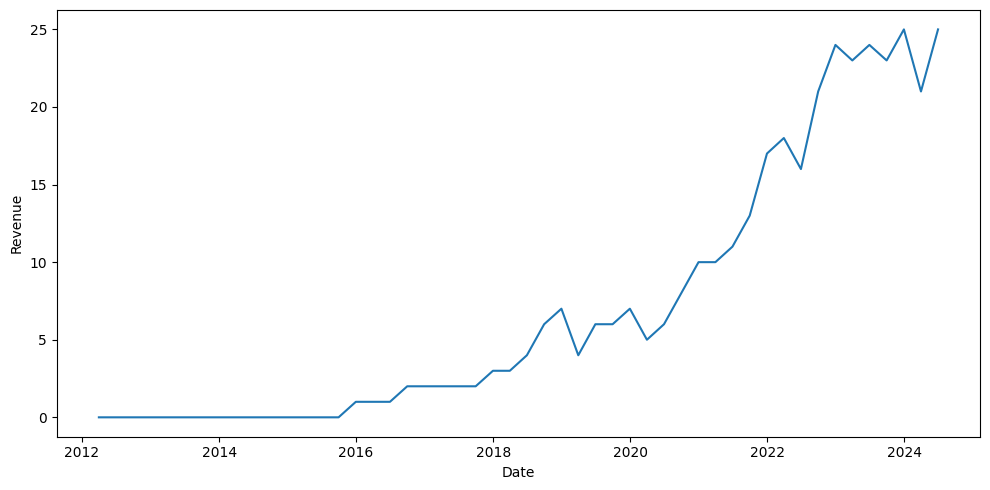

In [11]:
#Serie de tiempo

fig, axis = plt.subplots(figsize = (10, 5))

df_filtro["Date"] = pd.to_datetime(df_filtro["Date"])
df_filtro["Revenue"] = pd.to_numeric(df_filtro["Revenue"], errors='coerce')
df_filtro["Revenue"] = df_filtro["Revenue"].fillna(0).astype(int)
sns.lineplot(data = df_filtro, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

/tmp/ipykernel_17624/1648940251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue", palette="flare")


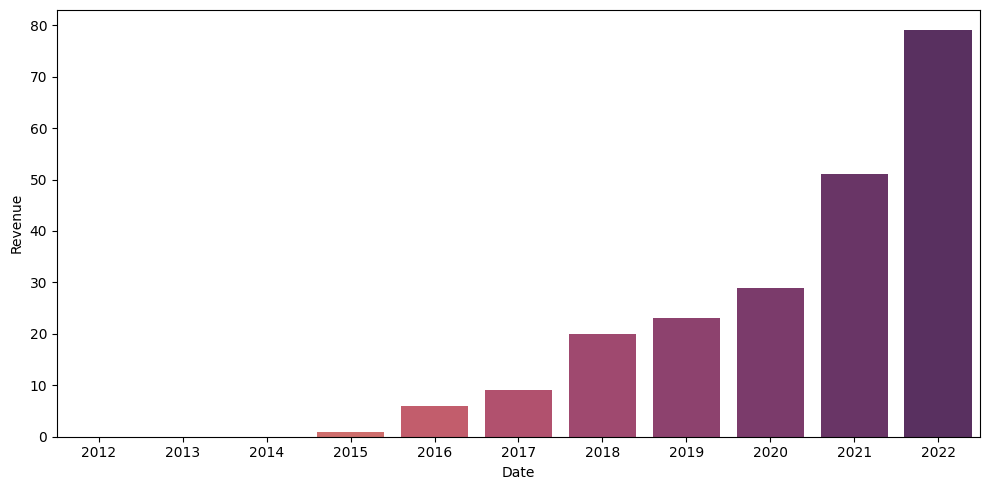

In [12]:
#Beneficio anual

fig, axis = plt.subplots(figsize = (10, 5))

df_filtro["Date"] = pd.to_datetime(df_filtro["Date"])
tesla_revenue_yearly = df_filtro.groupby(df_filtro["Date"].dt.year)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue", palette="flare")

plt.tight_layout()

plt.show()

/tmp/ipykernel_17624/3078544680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue", palette="light:#5A9")


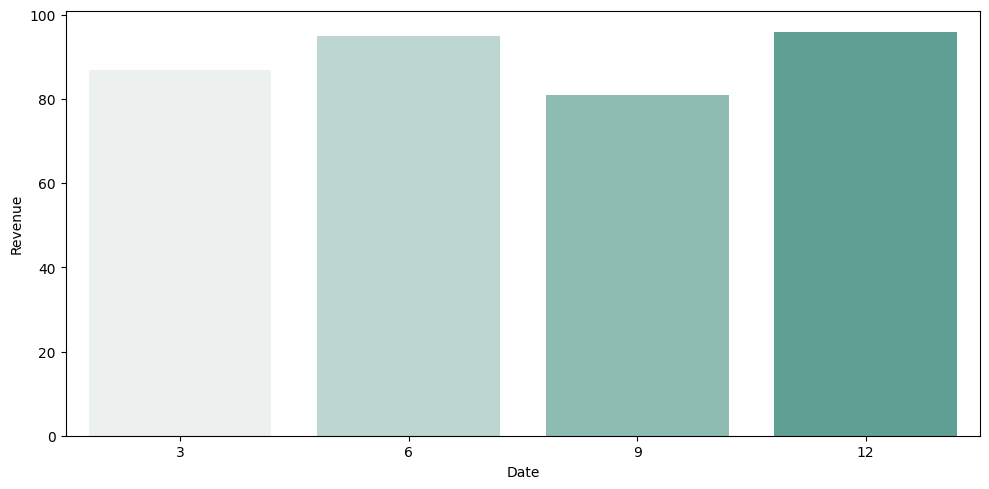

In [13]:
#Beneficio mensual

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df_filtro.groupby(df_filtro["Date"].dt.month)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue", palette="light:#5A9")

plt.tight_layout()

plt.show()